In [1]:
import numpy as np
import phate, magic
import scprep, scanpy
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import spearmanr, pearsonr
import pandas as pd
import leidenalg
from sklearn.preprocessing import scale

In [2]:
trajectory_data = np.load('../data/splatter_simulated_data.npz')
data = trajectory_data['data']
time = trajectory_data['pseudotime']
true_counts = trajectory_data['true_counts']
true_lib_size = true_counts.T.sum(axis=1)

In [3]:
names = ['GSPA_QR', 'DiffusionEMD', 'MAGIC', 'Signals', 'GSPA', 'GAE_att_Ggene',
       'GAE_noatt_Ggene', 'Node2Vec_Ggene', 'Eigenscore', 'GFMMD', 'SIMBA', 'siVAE']

In [4]:
# combine pseudotime label for each cell with its counts
df = pd.concat((pd.Series(time), pd.DataFrame(true_counts)), axis=1)
df.columns = ['time'] + df.columns[1:].tolist()
df['time'] = df['time'].round(2)
# get average expression in time bins
averaged_by_time = df.groupby('time').mean()
# for each gene, get cell bin with peak and time of that bin
order = []
for gene in averaged_by_time.columns:
    order.append(averaged_by_time.index[averaged_by_time[gene].argmax()])

2024-06-21 13:54:36,259:[WARNING](pygsp.graphs.graph._check_fourier_properties): The Fourier basis G.U is not available, we need to compute the Fourier basis. Explicitly call G.compute_fourier_basis() once beforehand to suppress the warning.
2024-06-21 13:54:36,262:[WARNING](pygsp.graphs.graph.compute_fourier_basis): Computing the full eigendecomposition of a large matrix (8821 x 8821) may take some time.


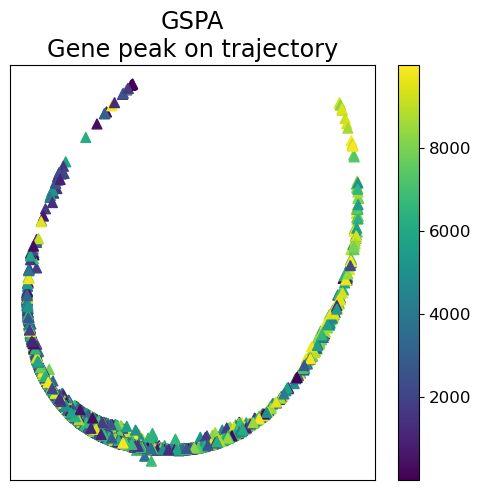

<Figure size 640x480 with 0 Axes>

In [5]:
for method in names:
    results = np.load(f'results/{method}/0_results.npz')
    
    gene_phate_op = phate.PHATE(random_state=1234, verbose=False, use_pygsp=True)
    gene_data_phate = gene_phate_op.fit_transform(results['signal_embedding'])
    fiedler = gene_phate_op.graph.U[:, 1]
    
    scprep.plot.scatter2d(gene_data_phate, marker='^',
                      c=order, s=50, ticks=None, figsize=(5,5),
                          title=method + '\nGene peak on trajectory', cmap='viridis',
                      filename=f'figures/{method}_gene_peak.png', dpi=200, discrete=False)
    
    
    plt.show(); plt.clf()